In [1]:
#IMPORTING
import sys
import os
import cv2
import easygui
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
#Reading the image
ImagePath=easygui.fileopenbox()
img1=cv2.imread(ImagePath)
if img1 is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [3]:
#Converting the color space from RGB to Grayscale
img1g=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)

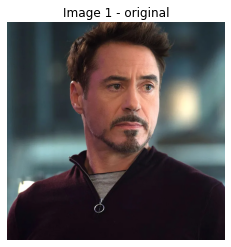

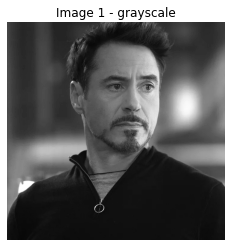

In [4]:
#Displaying all the images
plt.imshow(img1)
plt.axis("off")
plt.title("Image 1 - original")
plt.show()

plt.imshow(img1g,cmap='gray')
plt.axis("off")
plt.title("Image 1 - grayscale")
plt.show()

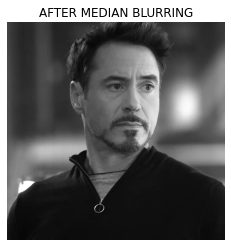

In [5]:
#Median Blurring
img1b=cv2.medianBlur(img1g,3)
plt.imshow(img1b,cmap='gray')
plt.axis("off")
plt.title("AFTER MEDIAN BLURRING")
plt.show()

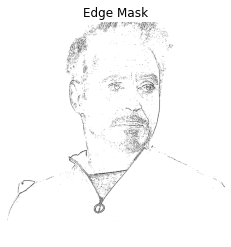

In [6]:
#Creating edge mask
edges=cv2.adaptiveThreshold(img1b,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,3)
plt.imshow(edges,cmap='gray')
plt.axis("off")
plt.title("Edge Mask")
plt.show()

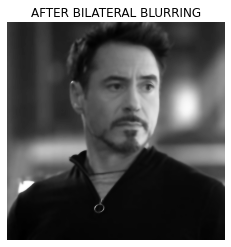

In [7]:
#Removing noise
img1bb=cv2.bilateralFilter(img1b, 15, 75, 75)
plt.imshow(img1bb,cmap='gray')
plt.axis("off")
plt.title("AFTER BILATERAL BLURRING")
plt.show()

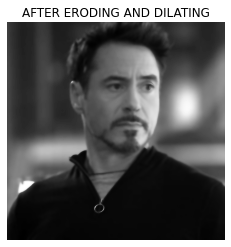

In [8]:
#Eroding and Dilating
kernel=np.ones((1,1),np.uint8)
img1e=cv2.erode(img1bb,kernel,iterations=3)
img1d=cv2.dilate(img1e,kernel,iterations=3)
plt.imshow(img1d,cmap='gray')
plt.axis("off")
plt.title("AFTER ERODING AND DILATING")
plt.show()

# COLOR QUANTIZATION

Color Quantization is implemented by using clustering alogrithms. There are 3 different types of clustering - 
1.Exclusive Clustering
2.Overlapping Clustering
3.Hierarchial Clustering

Here we use exclusive clustering. K-MEANS technique is used.

In [9]:
#Clustering - (K-MEANS)
imgf=np.float32(img1).reshape(-1,3)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
compactness,label,center=cv2.kmeans(imgf,5,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
final_img=center[label.flatten()]
final_img=final_img.reshape(img1.shape)

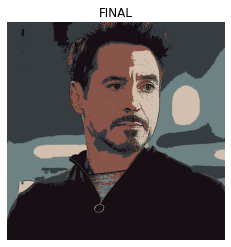

In [10]:
final=cv2.bitwise_and(final_img,final_img,mask=edges)
plt.imshow(final,cmap='gray')
plt.axis("off")
plt.title("FINAL")
plt.show()